In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Trulia_Real_Estate.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'City', 'Neighbourhood', 'Price', 'Year Built',
       'Beds', 'Baths', 'Area', 'Price(per sqft)', 'A/C'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No
...,...,...,...,...,...,...,...,...,...,...
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,"$1,395,000",Year Built: 2008,2 Beds,2 Baths,"1,185 sqft","$1,177",No
383,140 E 2nd St #6U,"Brooklyn, NY 11218",Windsor Terrace,"$595,000",Year Built: 1940,1 Bed,1 Bath,Null,No Info,No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,"$279,900",Year Built: 1974,2 Beds,1 Bath,"1,100 sqft",$254,Heating & Cooling
385,2415 E 64th St,"Brooklyn, NY 11234",Mill Basin,"$1,089,000",Year Built: 1965,4 Beds,3 Baths,"1,899 sqft",$573,Heating & Cooling


In [ ]:
#data cleaning

In [ ]:
n1= df["City"].str.split(",", n=1, expand=True)[0]
df["City"] = n1

In [ ]:
n2= df["Year Built"].str.split(": ", n=1, expand=True)[1]
df["Year Built"] = n2

In [ ]:
n3= df["Beds"].str.split(" ", n=1, expand=True)[0]
n3 = n3.str.replace('Studio', '0')
df["Beds"] = n3

In [ ]:
n4 = df["Baths"].str.split(" ", n=1, expand=True)[0]
df["Baths"] = n4

In [ ]:
n5 = df["Area"].str.split(" ", n=1, expand=True)[0]
n5 = n5.str.replace(',', '')
df["Area"] = n5

In [ ]:
n6 = df["Price(per sqft)"].str.split("$", n=1, expand=True)[1]
n6 = n6.str.replace(',', '')
df["Price(per sqft)"] = n6

In [ ]:
n7 = df["Price"].str.split("$", n=1, expand=True)[1]
n7 = n7.str.replace(',', '')
df["Price"] = n7

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,Long Island City,Astoria,620000,2022,0,1,441,1406,Cooling only
2,37-26 32nd St #3G,Long Island City,Astoria,730000,2022,1,1,579,1261,Cooling only
3,37-26 32nd St #6L,Long Island City,Astoria,570000,2022,0,1,429,1329,Cooling only
4,37-26 32nd St #3H,Long Island City,Astoria,695000,2022,1,1,632,1100,No
6,2736 Independence Ave #6J,Bronx,Spuyten Duyvil,235995,1970,1,1,850,278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,New York,Upper East Side,635000,1975,0,1,528,1203,Cooling only
381,43 Joralemon St,Brooklyn,Brooklyn Heights,4500000,1845,5,6,3192,1410,No
382,195 Classon Ave #5,Brooklyn,Bedford Stuyvesant,1395000,2008,2,2,1185,1177,No
384,410 Maryland Ave #1C,Staten Island,Rosebank,279900,1974,2,1,1100,254,Heating & Cooling


In [ ]:
#model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['Year Built','Beds', 'Baths']]
        #,'Area']]

y = df[['Price']]

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [ ]:
X.dtypes

Year Built    int64
Beds          int64
Baths         int64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

,Year Built,Beds,Baths
83,2022,0,1
102,2008,2,2
329,1910,6,4
262,2008,2,2
286,1970,1,1
...,...,...,...
97,1940,2,2
110,1986,1,1
124,2022,1,1
17,1940,2,2


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

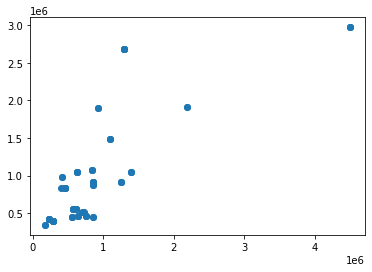

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, predictions)
r = r2_score(y_test, predictions)

print(f"R2 Score: {r}")
# print(f"Mean Squared Error: {mse}")

R2 Score: 0.5612727865961878


In [ ]:
year = 2002
beds = 2
bath = 2

In [ ]:
price = lm.predict(pd.DataFrame([[year, beds, bath]],
                                            columns=['Year Built','Beds', 'Baths']))

In [ ]:
print(price)

[[1034369.5457509]]


In [ ]:
import pickle
pickle.dump(lm, open('model.pkl', 'wb'))


In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([[ 550053.12582878],
       [ 395846.1727495 ],
       [ 343688.53706178],
       [ 981489.99983971],
       [ 875730.90801732],
       [ 395846.1727495 ],
       [ 418111.60167753],
       [2685027.25394565],
       [ 418111.60167753],
       [1044162.05425297],
       [2971327.7731559 ],
       [1909716.21419871],
       [1044162.05425297],
       [1046120.55595339],
       [ 550053.12582878],
       [ 912942.4403252 ],
       [2685027.25394565],
       [ 832643.8706082 ],
       [2685027.25394565],
       [ 832643.8706082 ],
       [ 418111.60167753],
       [ 912942.4403252 ],
       [1901160.29717358],
       [1073539.57975919],
       [ 447489.12718375],
       [2685027.25394565],
       [ 395846.1727495 ],
       [ 912942.4403252 ],
       [ 550053.12582878],
       [ 447489.12718375],
       [ 550053.12582878],
       [ 550053.12582878],
       [ 912942.4403252 ],
       [ 449447.62888417],
       [1901160.29717358],
       [ 458003.5459093 ],
       [ 458003.5459093 ],
 